<a href="https://colab.research.google.com/github/Shahedur23036883/MLNN_tutorial/blob/main/Enhancing_Cerebral_Stroke_Prediction_with_Machine_Learning_on_Imbalanced_Data%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import *
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the dataset

In [5]:
#Load dataset
df = pd.read_csv('dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0.0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0.0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34532,42854,Female,67.0,0,0,Yes,Private,Rural,90.87,21.5,NaN,0.0
34533,50762,Female,29.0,0,0,Yes,Private,Urban,62.08,29.6,never smoked,0.0
34534,55236,Female,31.0,0,0,Yes,Private,Urban,79.80,39.2,smokes,0.0
34535,25675,Female,30.0,0,0,No,Private,Urban,112.14,29.3,formerly smoked,0.0


# Step 2: Exploratory Data Analysis (EDA)

In [6]:
print("Dataset Shape:", df.shape)

Dataset Shape: (34537, 12)


In [7]:
print("First 5 rows:\n", df.head())

First 5 rows:
       id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [8]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,34537.000000,34537.000000,34537.000000,34537.000000,34537.000000,33376.000000,34536.000000
mean,36293.797579,42.264156,0.095000,0.047369,104.563600,28.633785,0.017692
std,21039.380836,22.493528,0.293219,0.212431,43.157557,7.770978,0.131830
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,17965.000000,24.000000,0.000000,0.000000,77.550000,23.200000,0.000000
50%,36364.000000,44.000000,0.000000,0.000000,91.630000,27.800000,0.000000
75%,54388.000000,60.000000,0.000000,0.000000,112.140000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


In [10]:
print("Descriptive Statistics:\n", df.describe(include='all'))
print("Unique Values:\n", df.nunique())

Descriptive Statistics:
                   id  gender           age  hypertension  heart_disease  \
count   34537.000000   34537  34537.000000  34537.000000   34537.000000   
unique           NaN       3           NaN           NaN            NaN   
top              NaN  Female           NaN           NaN            NaN   
freq             NaN   20420           NaN           NaN            NaN   
mean    36293.797579     NaN     42.264156      0.095000       0.047369   
std     21039.380836     NaN     22.493528      0.293219       0.212431   
min         1.000000     NaN      0.080000      0.000000       0.000000   
25%     17965.000000     NaN     24.000000      0.000000       0.000000   
50%     36364.000000     NaN     44.000000      0.000000       0.000000   
75%     54388.000000     NaN     60.000000      0.000000       0.000000   
max     72943.000000     NaN     82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level           

In [11]:
df['stroke'].value_counts()

,count
stroke,
0.0,33925
1.0,611


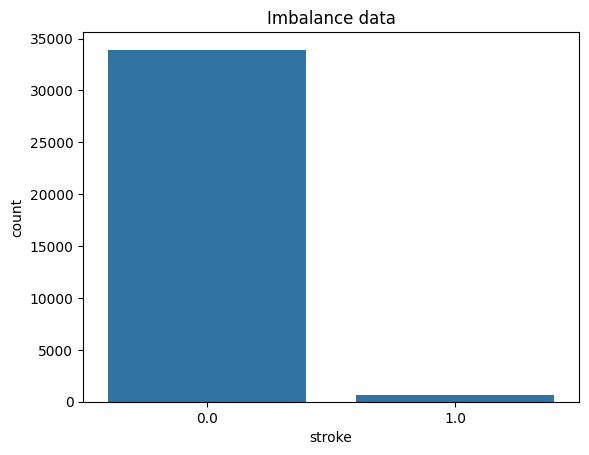

In [12]:
sns.countplot(x='stroke', data=df)
plt.title("Imbalance data")
plt.show()

One Hot Encoding

In [13]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
df.head(4)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0.0,False,True,False,...,False,False,False,False,True,True,False,False,False,False
1,30468,58.0,1,0,87.96,39.2,0.0,False,True,False,...,False,False,True,False,False,False,True,False,True,False
2,16523,8.0,0,0,110.89,17.6,0.0,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,56543,70.0,0,0,69.04,35.9,0.0,True,False,False,...,False,False,True,False,False,True,False,True,False,False


In [15]:
# Check for duplicates
print("Total duplicates:", df.duplicated().sum())

Total duplicates: 0


In [16]:
# Remove duplicates (if any)
df = df.drop_duplicates()
print("New shape after removing duplicates:", df.shape)

New shape after removing duplicates: (34537, 22)


Missing values:
 id                                   0
age                                  0
hypertension                         0
heart_disease                        0
avg_glucose_level                    0
bmi                               1161
stroke                               1
gender_Female                        0
gender_Male                          0
gender_Other                         0
ever_married_No                      0
ever_married_Yes                     0
work_type_Govt_job                   0
work_type_Never_worked               0
work_type_Private                    0
work_type_Self-employed              0
work_type_children                   0
Residence_type_Rural                 0
Residence_type_Urban                 0
smoking_status_formerly smoked       0
smoking_status_never smoked          0
smoking_status_smokes                0
dtype: int64


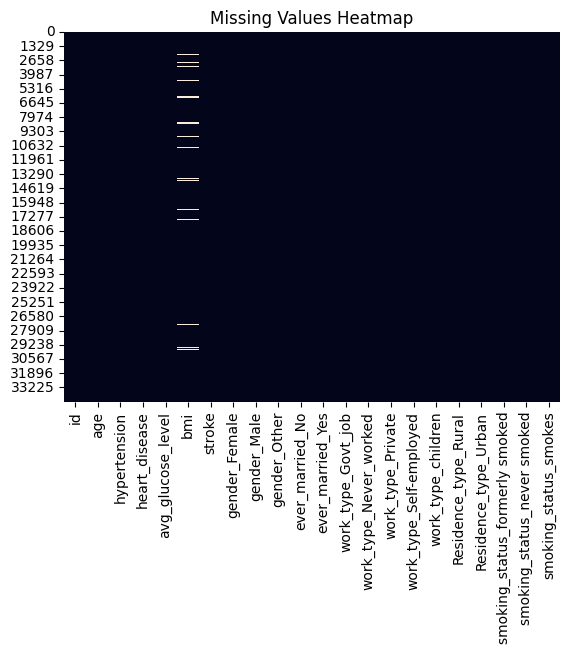

In [17]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [18]:
imputer = KNNImputer(missing_values=np.nan)
tab = imputer.fit_transform(df)
df_new = pd.DataFrame(tab, columns=df.columns)
df_new.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669.0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,30468.0,58.0,1.0,0.0,87.96,39.2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,16523.0,8.0,0.0,0.0,110.89,17.6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56543.0,70.0,0.0,0.0,69.04,35.9,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,46136.0,14.0,0.0,0.0,161.28,19.1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,32257.0,47.0,0.0,0.0,210.95,50.1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,52800.0,52.0,0.0,0.0,77.59,17.7,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,41413.0,75.0,0.0,1.0,243.53,27.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,15266.0,32.0,0.0,0.0,77.67,32.3,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,28674.0,74.0,1.0,0.0,205.84,54.6,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
print("Descriptive Statistics:\n", df.describe(include='all'))
print("Unique Values:\n", df.nunique())

Descriptive Statistics:
                   id           age  hypertension  heart_disease  \
count   34537.000000  34537.000000  34537.000000   34537.000000   
unique           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN            NaN   
mean    36293.797579     42.264156      0.095000       0.047369   
std     21039.380836     22.493528      0.293219       0.212431   
min         1.000000      0.080000      0.000000       0.000000   
25%     17965.000000     24.000000      0.000000       0.000000   
50%     36364.000000     44.000000      0.000000       0.000000   
75%     54388.000000     60.000000      0.000000       0.000000   
max     72943.000000     82.000000      1.000000       1.000000   

        avg_glucose_level           bmi        stroke gender_Female  \
count        34537.000000  33376.000000  34536.000000         34537   
unique                NaN   

# Step 3: Data Preprocessing

In [20]:
# Filling missing values (if any)
df.fillna(df.median(), inplace=True)

In [21]:
# Encoding categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

In [22]:
# Splitting features and target variable
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [23]:
# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Visualizing Feature Distributions by Class

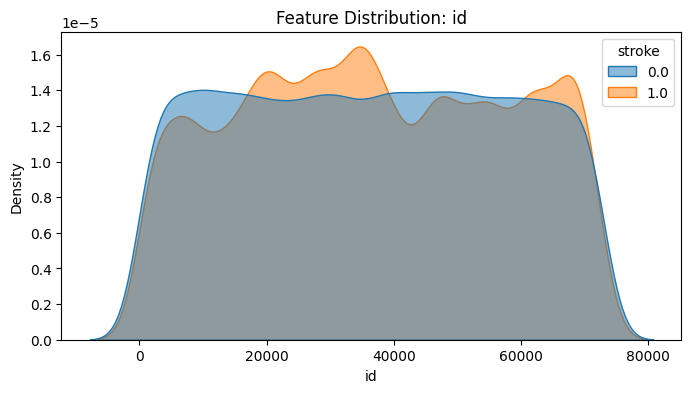

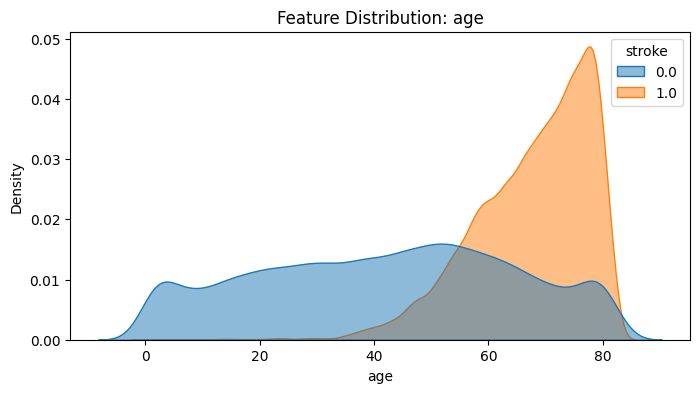

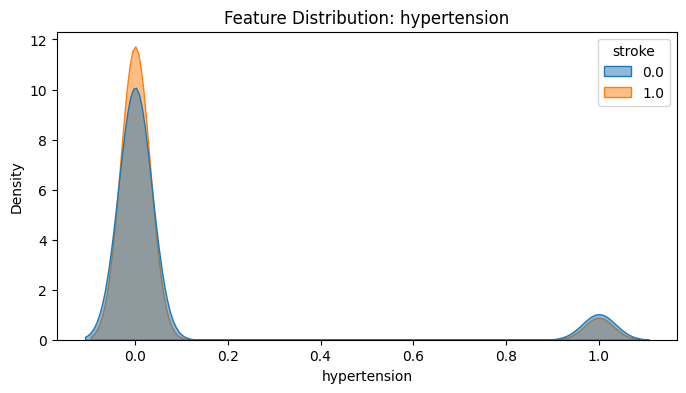

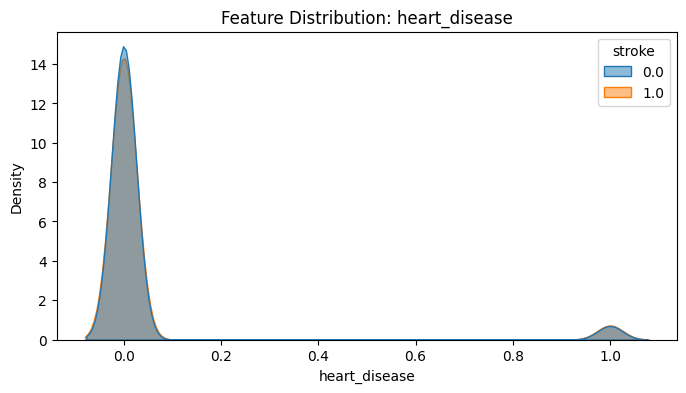

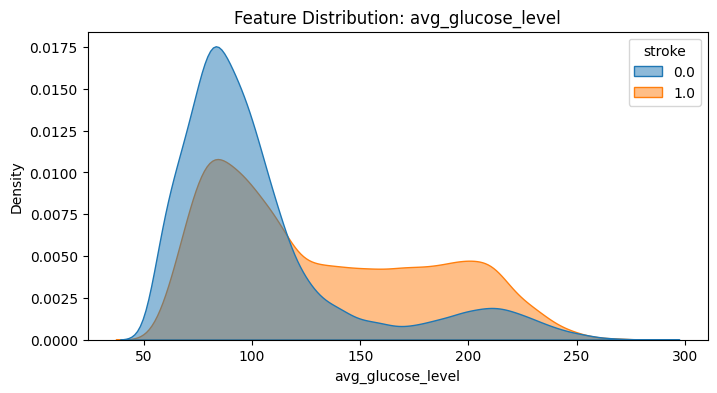

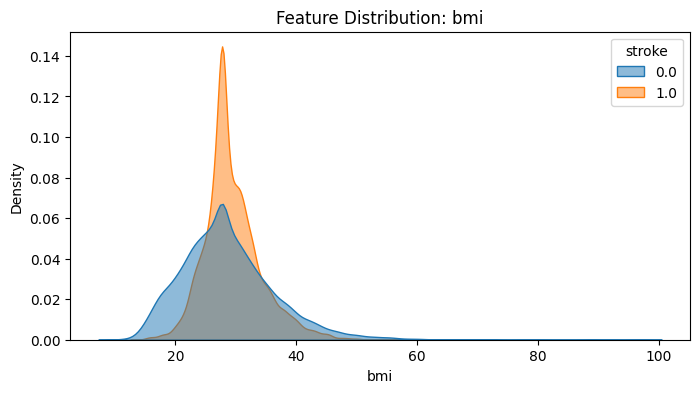

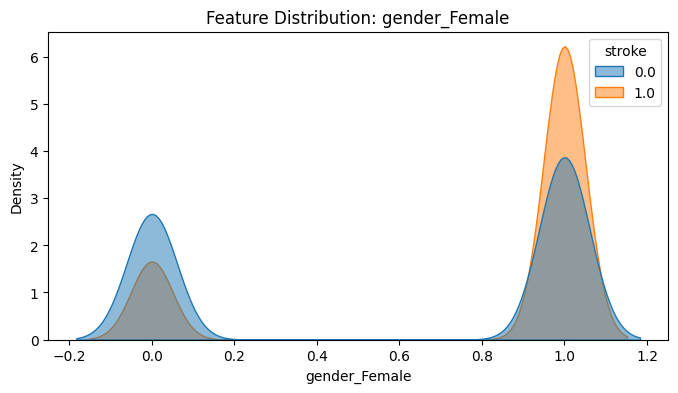

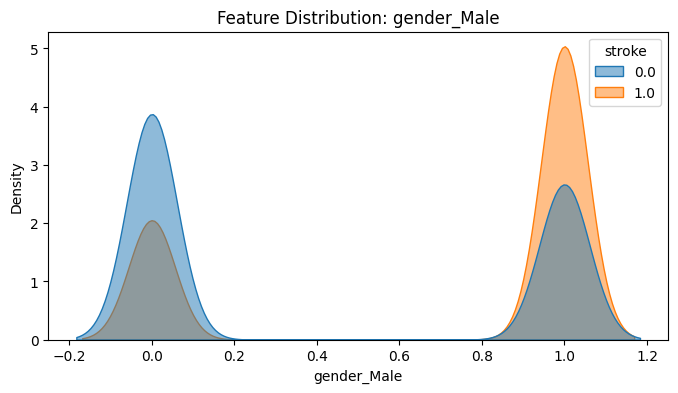

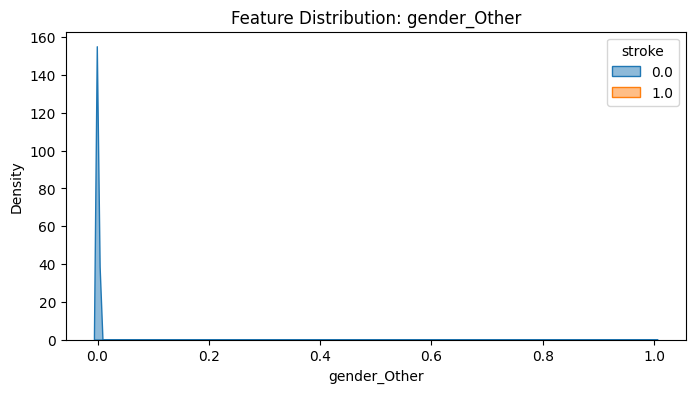

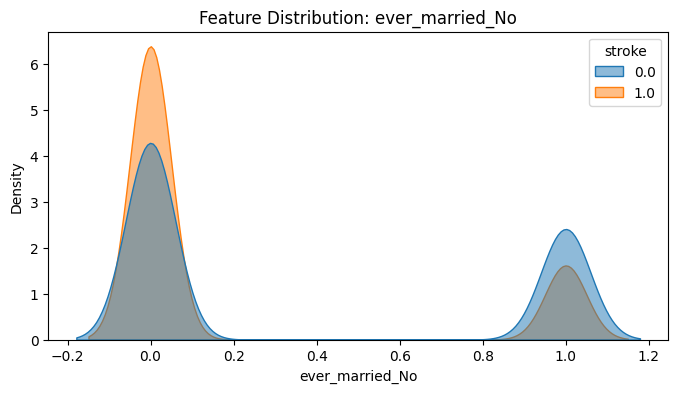

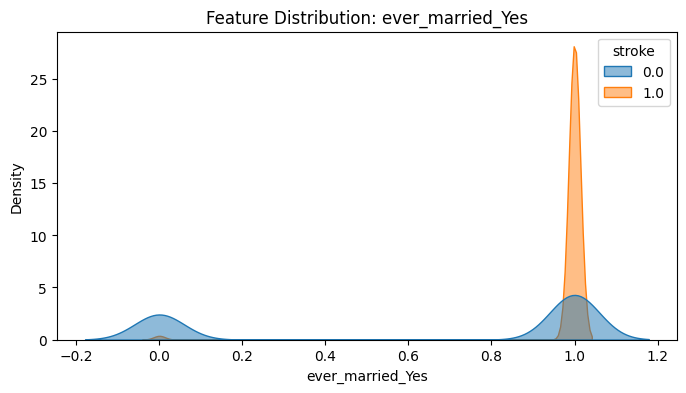

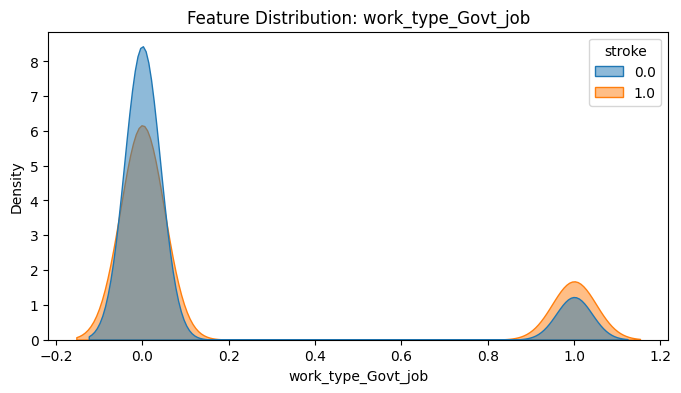

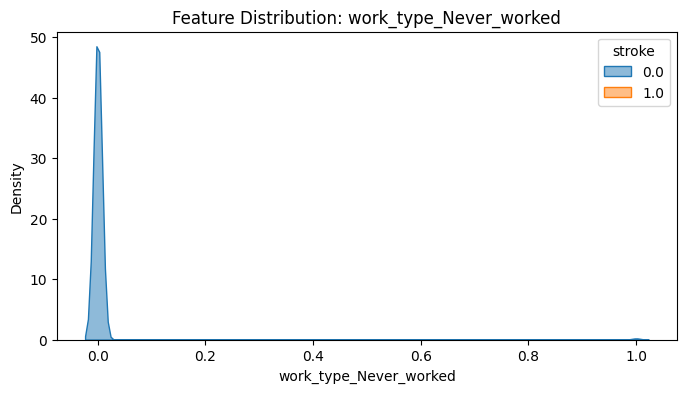

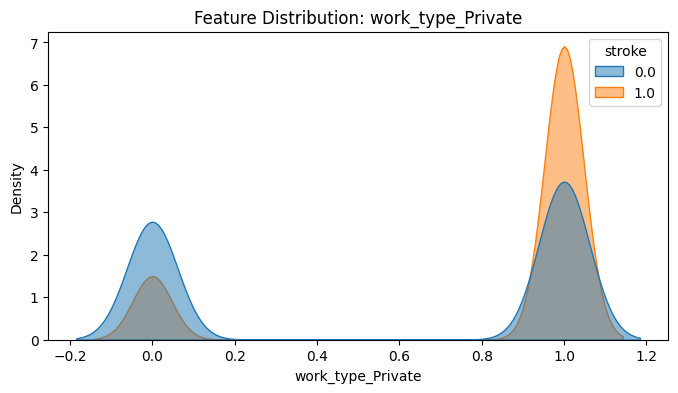

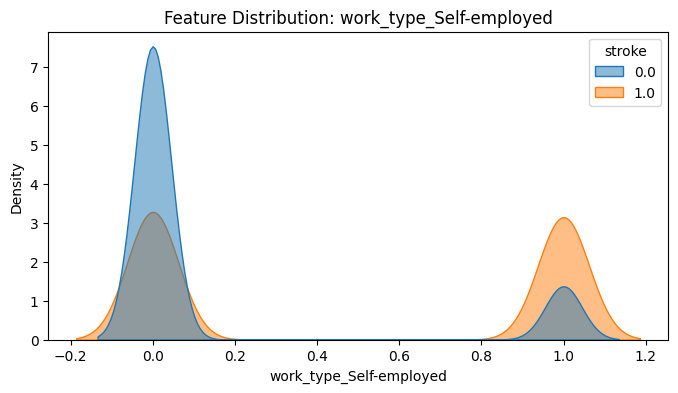

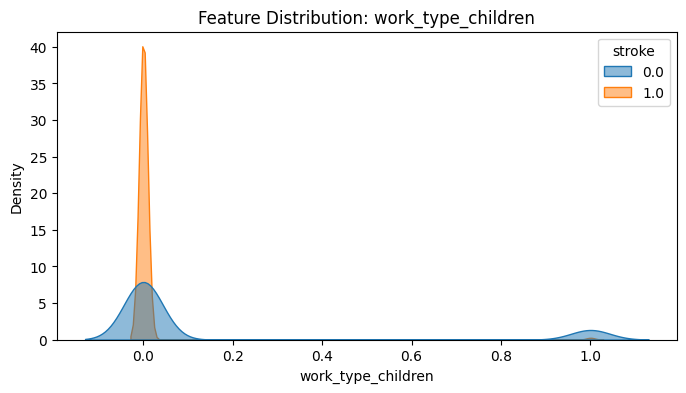

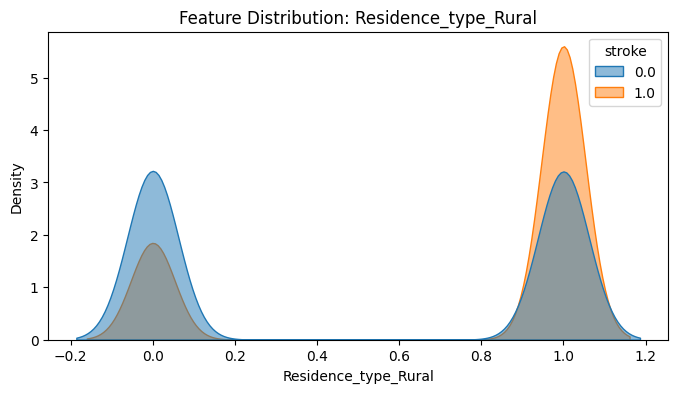

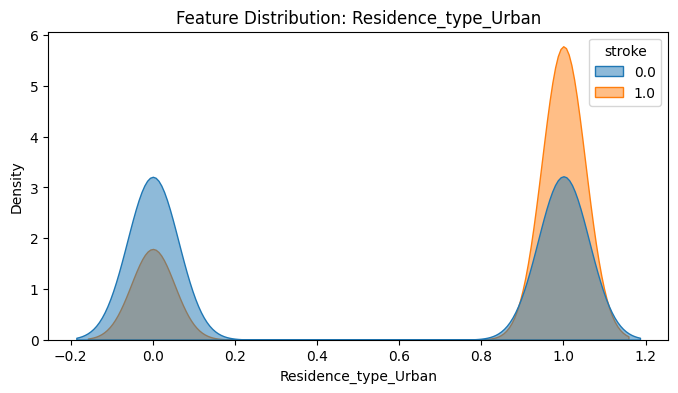

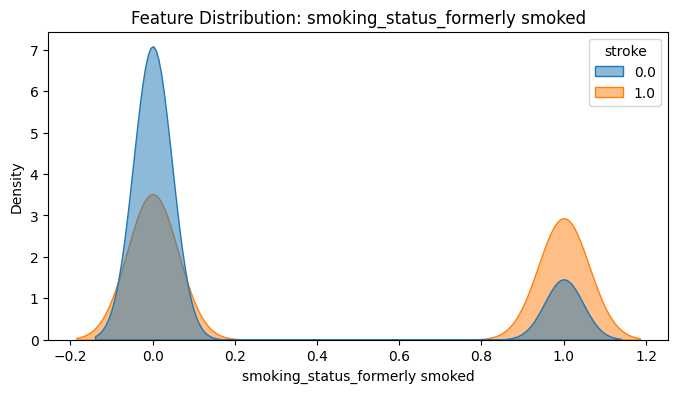

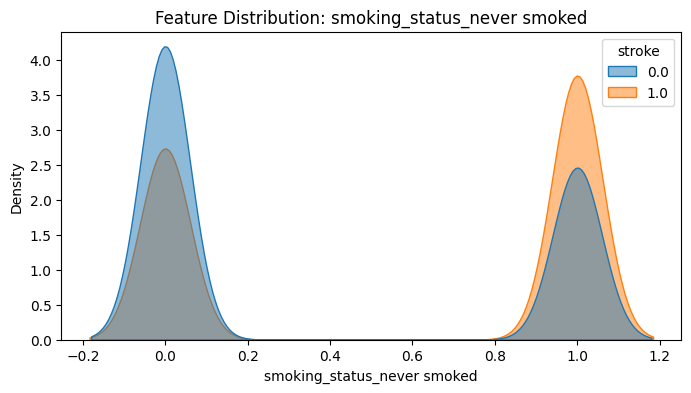

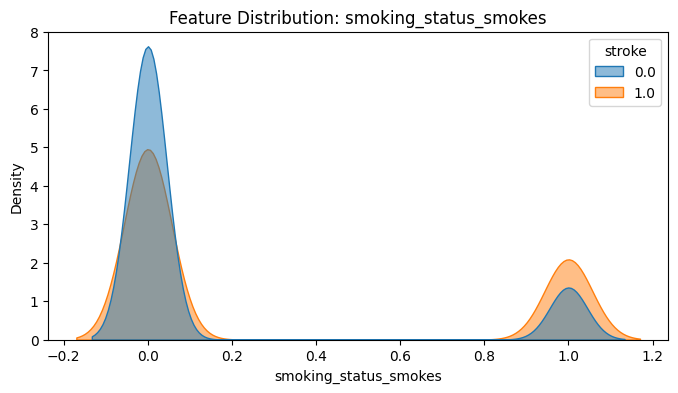

In [26]:
for col in X.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=X_resampled, x=col, hue=y_resampled, common_norm=False, fill=True, alpha=0.5)
    plt.title(f"Feature Distribution: {col}")
    plt.show()

# Step 5: Analyzing Feature-Target Relationships

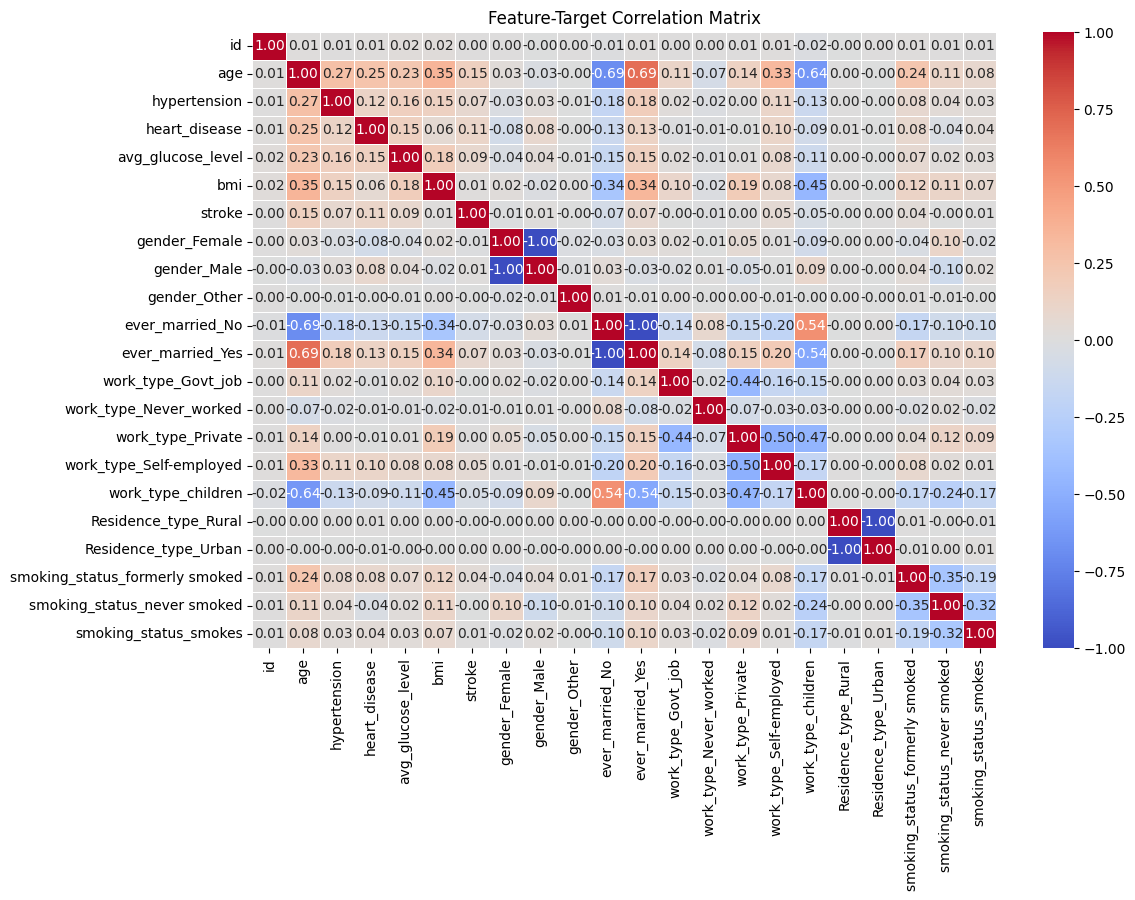

In [27]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature-Target Correlation Matrix")
plt.show()

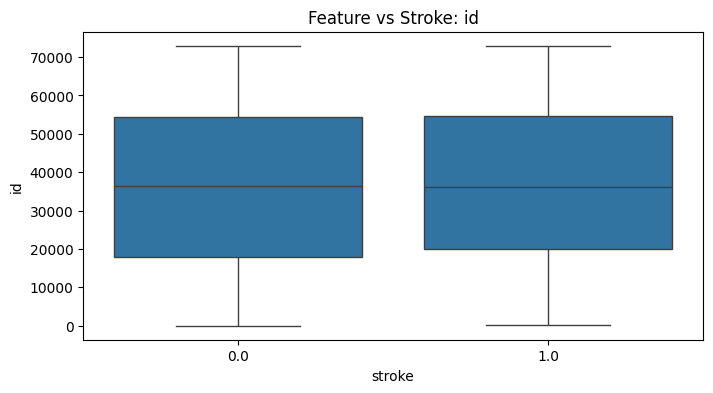

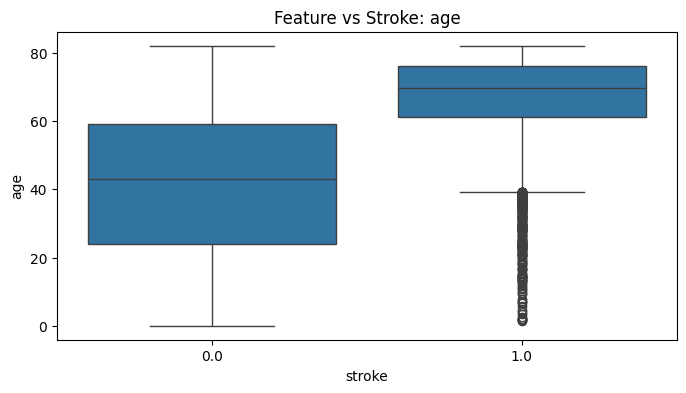

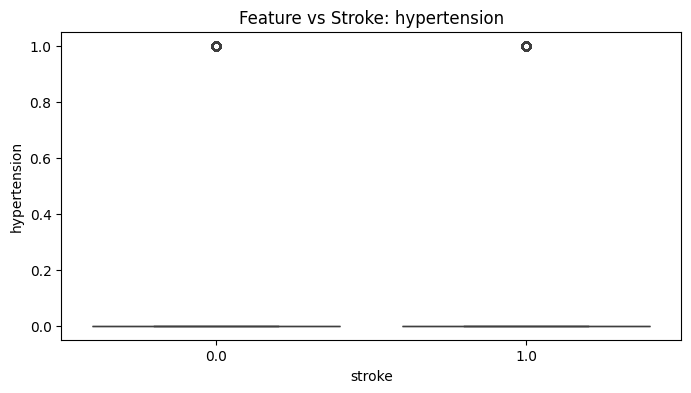

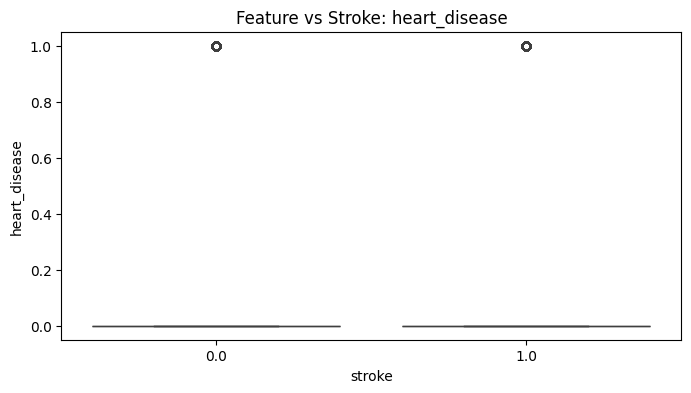

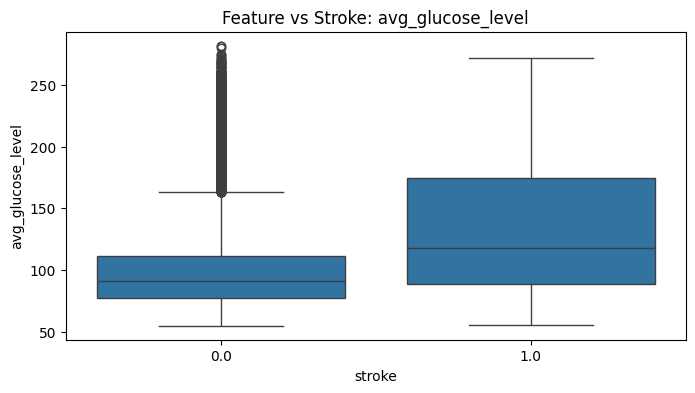

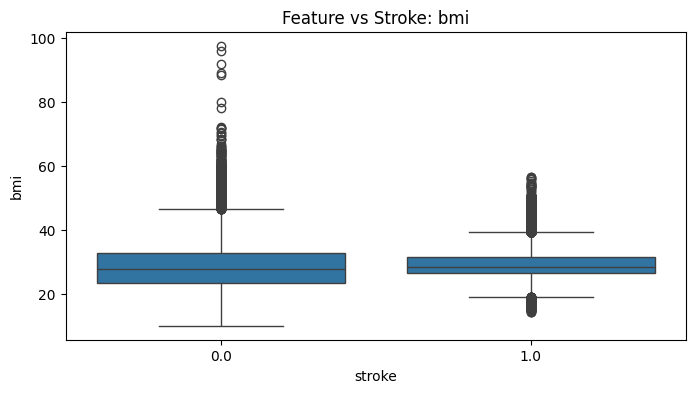

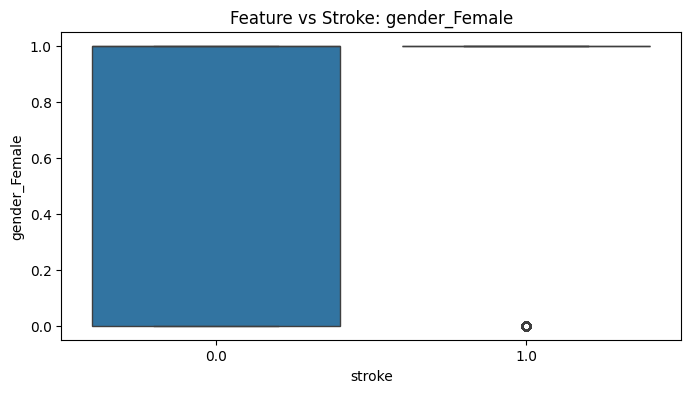

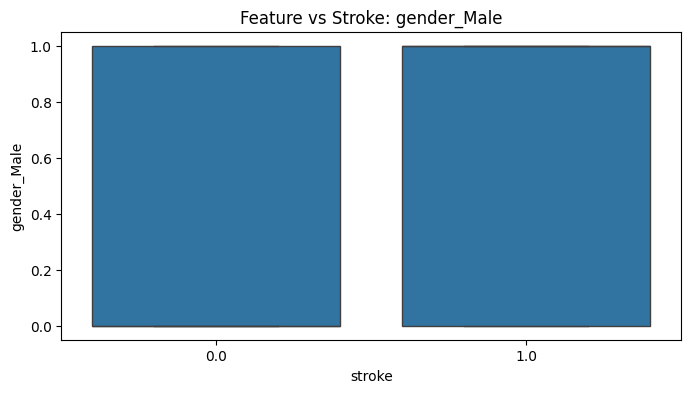

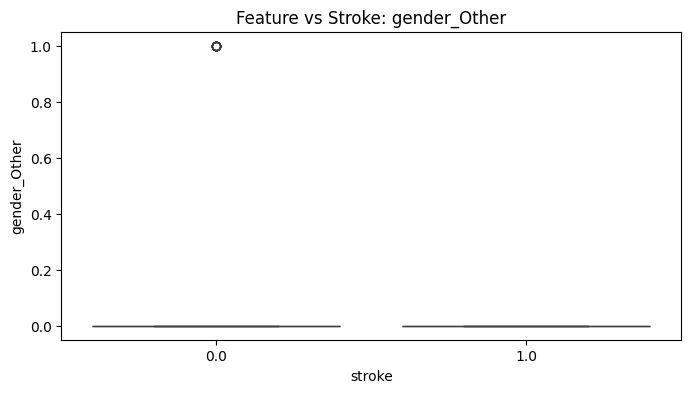

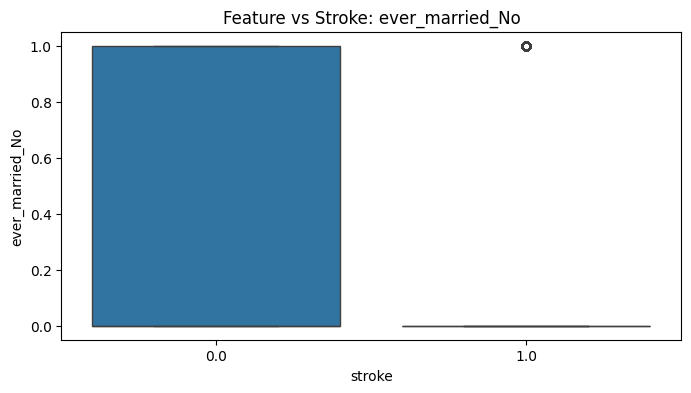

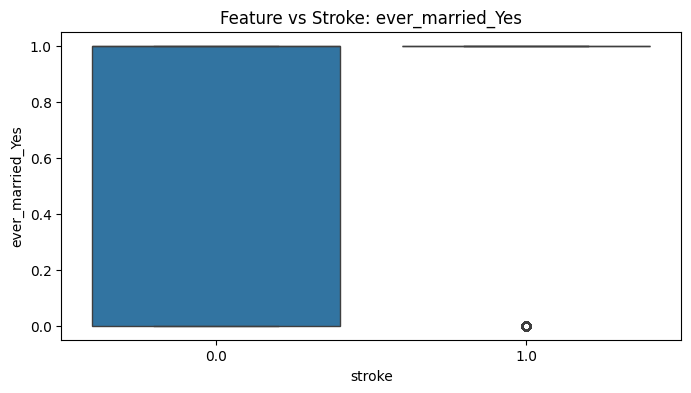

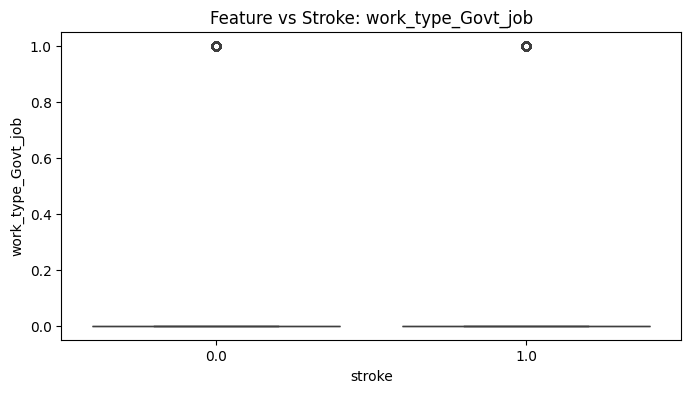

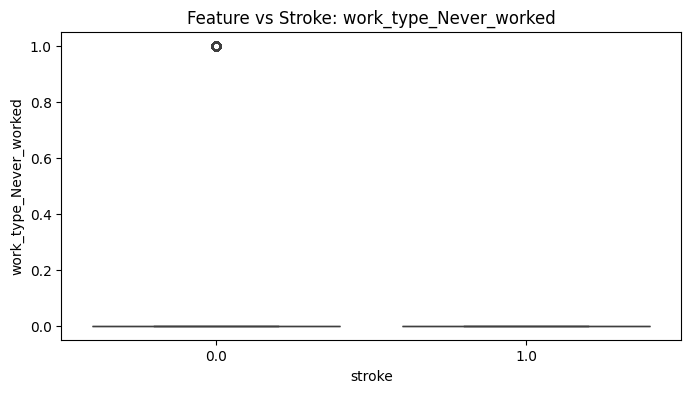

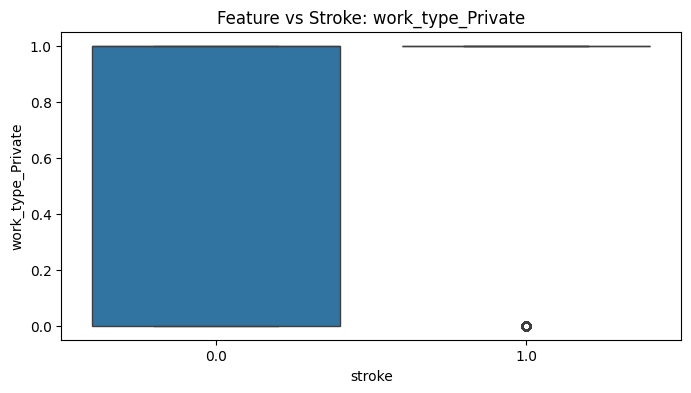

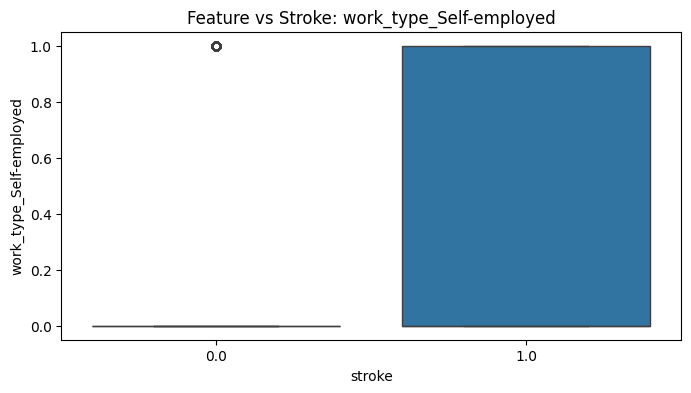

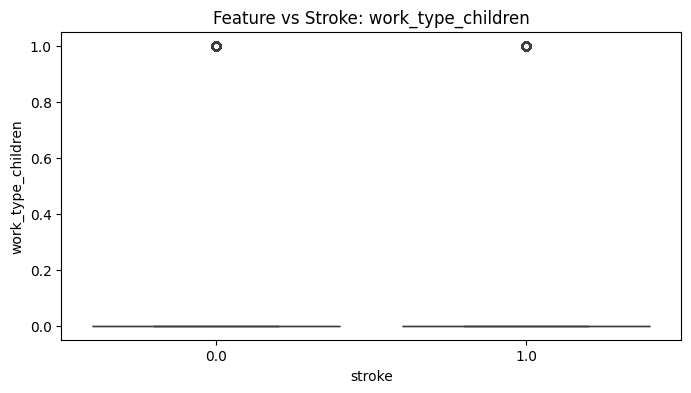

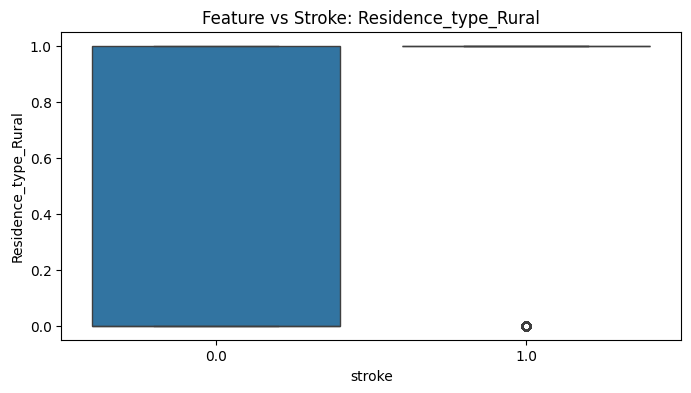

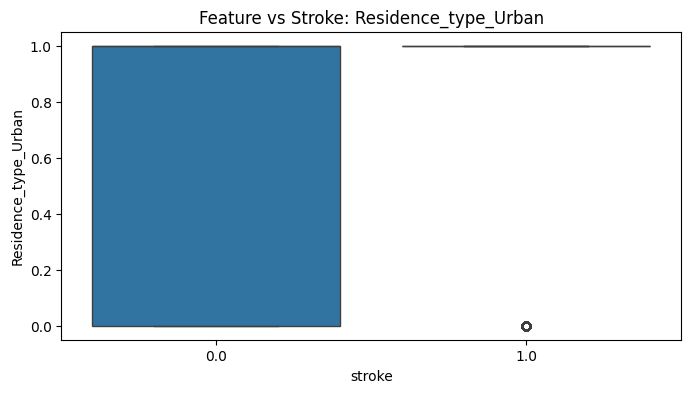

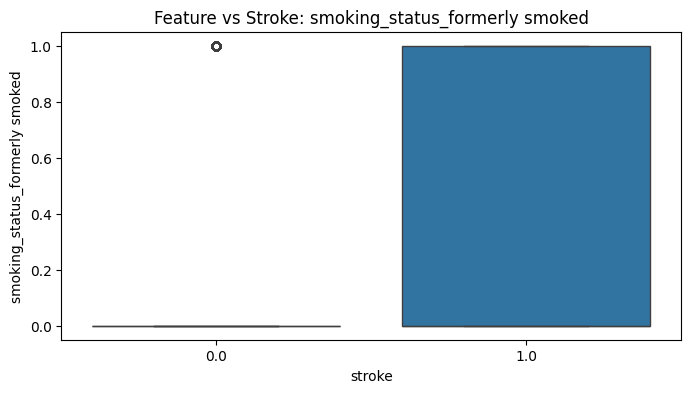

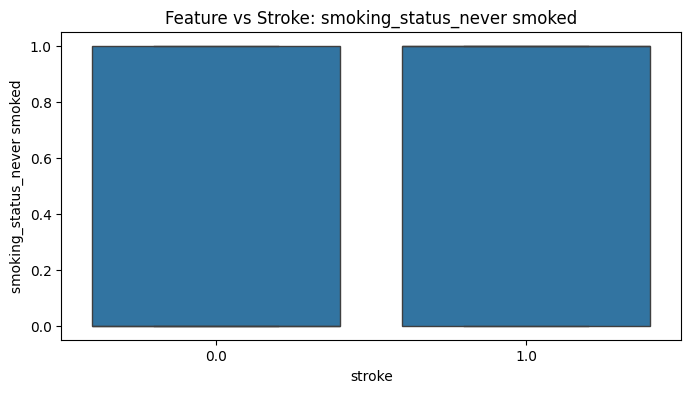

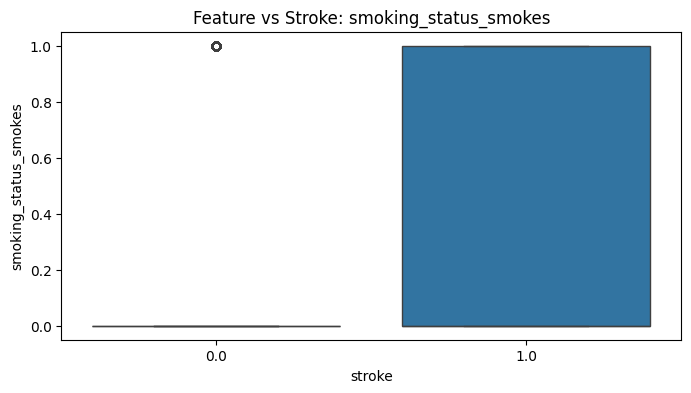

In [28]:
# Boxplots for numerical features grouped by target
for col in X.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=y_resampled, y=X_resampled[col])
    plt.title(f"Feature vs Stroke: {col}")
    plt.show()

# Step 6: Model Selection & Training

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 7: Model Evaluation

In [30]:
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy Score: 0.9895365116793162
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6813
         1.0       1.00      0.98      0.99      6758

    accuracy                           0.99     13571
   macro avg       0.99      0.99      0.99     13571
weighted avg       0.99      0.99      0.99     13571

Confusion Matrix:
 [[6798   15]
 [ 127 6631]]
ROC AUC Score: 0.9985288622055731


# Step 8: Feature Importance

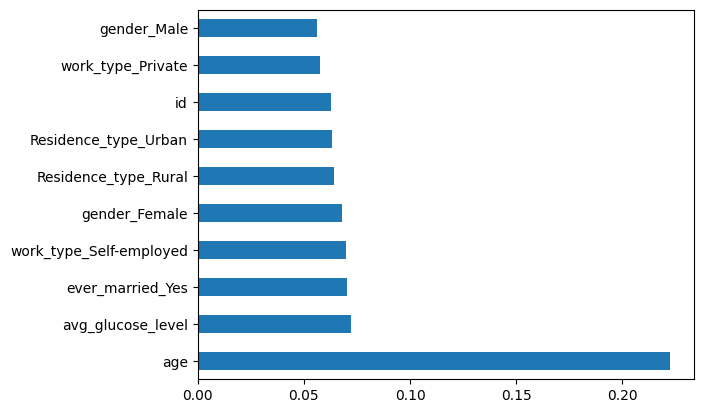

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()